# import important library to use

In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier 
from sklearn import svm 
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score 
from sklearn.metrics import jaccard_score
from sklearn.metrics import log_loss
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay ,accuracy_score

# Read Data

In [2]:
df = pd.read_csv(r'F:\CodSoft\Titanic\Titanic-Dataset.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
df.shape

(891, 12)

# Data Cleaning

In [4]:
# check null values
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [5]:
#drop unneccesary column
df=df.drop(columns=['Cabin','Name','PassengerId','Ticket'],axis=1)

In [6]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [7]:
df.shape

(891, 8)

In [8]:
df.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

In [9]:
# drop null values
df = df.dropna()
df.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

# Exploratory Data Analysis (EDA) 

### Return some information about our column

In [10]:
columns = df.columns
columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked'],
      dtype='object')

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 712 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  712 non-null    int64  
 1   Pclass    712 non-null    int64  
 2   Sex       712 non-null    object 
 3   Age       712 non-null    float64
 4   SibSp     712 non-null    int64  
 5   Parch     712 non-null    int64  
 6   Fare      712 non-null    float64
 7   Embarked  712 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 50.1+ KB


# Change sex and Embarked to integer binary values

In [12]:
df['Sex'].unique()

array(['male', 'female'], dtype=object)

In [13]:
le_sex = preprocessing.LabelEncoder()
le_sex.fit(['male','female'])
df['Sex']=le_sex.transform(df['Sex'])

In [14]:
df['Embarked'].unique()

array(['S', 'C', 'Q'], dtype=object)

In [15]:
le_Embarked = preprocessing.LabelEncoder()
le_Embarked.fit(['S', 'C', 'Q'])
df['Embarked']=le_Embarked.transform(df['Embarked'])

In [16]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,2
1,1,1,0,38.0,1,0,71.2833,0
2,1,3,0,26.0,0,0,7.9250,2
3,1,1,0,35.0,1,0,53.1000,2
4,0,3,1,35.0,0,0,8.0500,2


### Return some statistic information about our column

In [17]:
df.describe()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
count,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000
mean,0.404494,2.240169,0.636236,29.642093,0.514045,0.432584,34.567251,1.595506
std,0.491139,0.836854,0.481420,14.492933,0.930692,0.854181,52.938648,0.779038
min,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,20.000000,0.000000,0.000000,8.050000,2.000000
50%,0.000000,2.000000,1.000000,28.000000,0.000000,0.000000,15.645850,2.000000
75%,1.000000,3.000000,1.000000,38.000000,1.000000,1.000000,33.000000,2.000000
max,1.000000,3.000000,1.000000,80.000000,5.000000,6.000000,512.329200,2.000000


### the correlation between different features in the dataset

In [18]:
df.corr()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
Survived,1.000000,-0.356462,-0.536762,-0.082446,-0.015523,0.095265,0.266100,-0.181979
Pclass,-0.356462,1.000000,0.150826,-0.365902,0.065187,0.023666,-0.552893,0.244145
Sex,-0.536762,0.150826,1.000000,0.099037,-0.106296,-0.249543,-0.182457,0.109639
Age,-0.082446,-0.365902,0.099037,1.000000,-0.307351,-0.187896,0.093143,-0.032565
SibSp,-0.015523,0.065187,-0.106296,-0.307351,1.000000,0.383338,0.139860,0.033064
Parch,0.095265,0.023666,-0.249543,-0.187896,0.383338,1.000000,0.206624,0.011803
Fare,0.266100,-0.552893,-0.182457,0.093143,0.139860,0.206624,1.000000,-0.283510
Embarked,-0.181979,0.244145,0.109639,-0.032565,0.033064,0.011803,-0.283510,1.000000


### Visual representation of the correlation between different features in the dataset

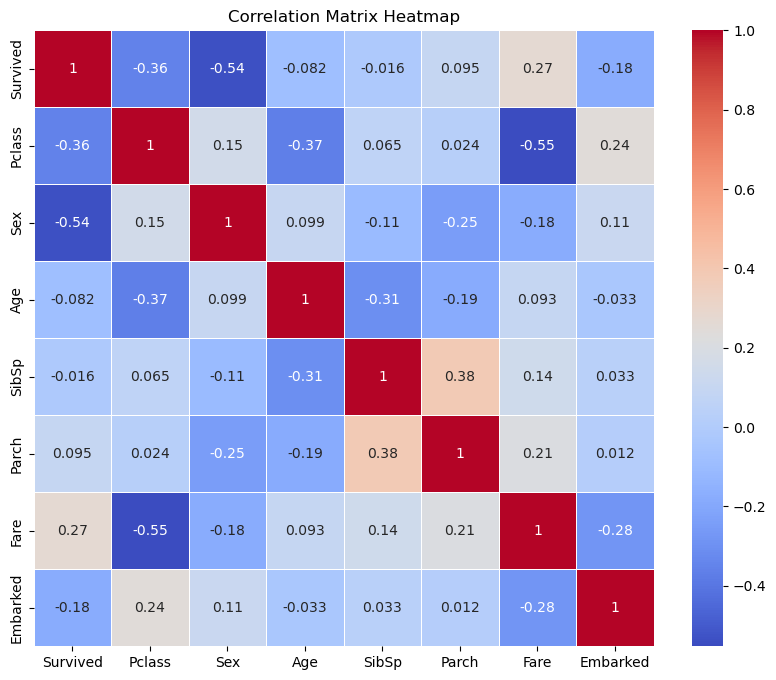

In [19]:
corr_matrix = df.corr()

# Create a heatmap to visualize the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

### heatmap representation of how the average values of each feature vary across different survived_column in the dataset.

<Axes: ylabel='Survived'>

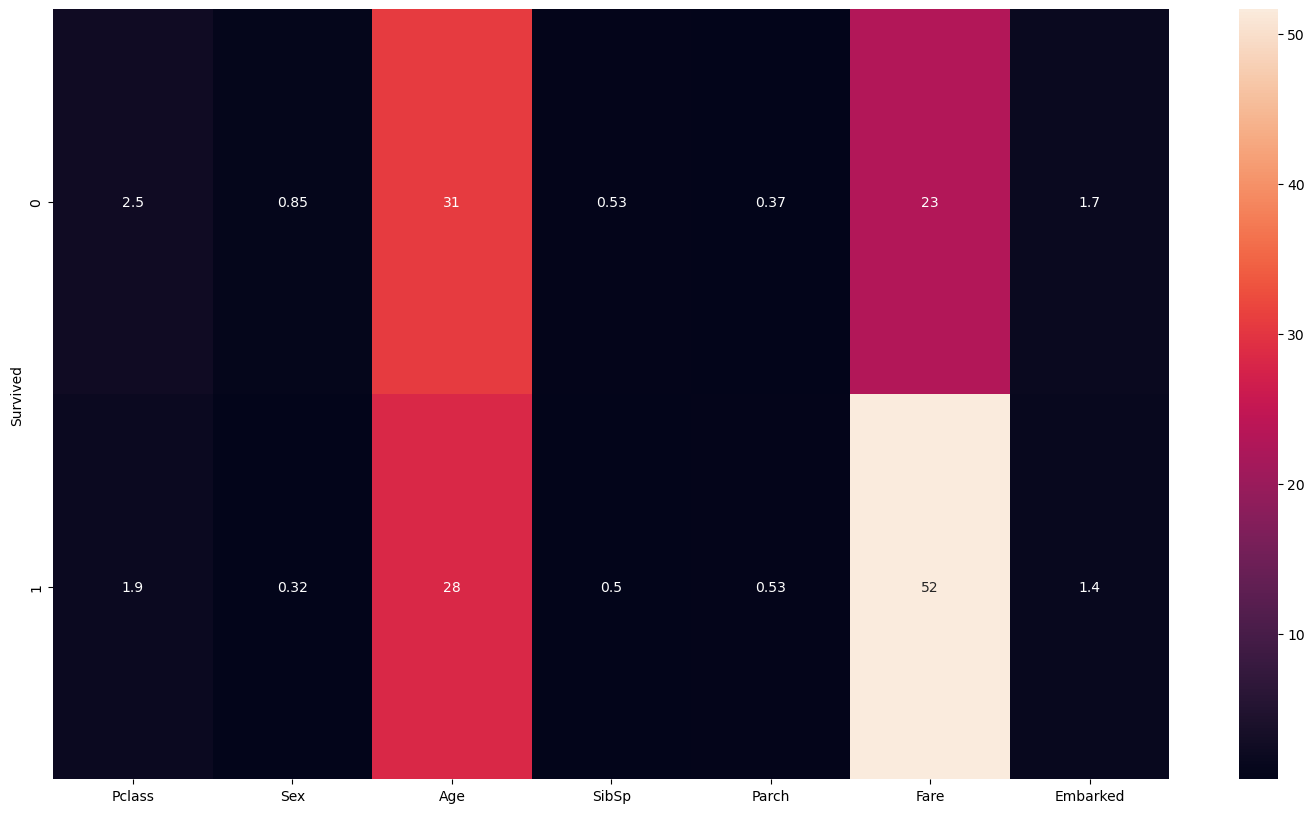

In [20]:
plt.figure(figsize=(18,10))
sns.heatmap(df.groupby('Survived').mean(),annot=True)

### Show distribution of values in each column of the dataset

<Figure size 1200x1200 with 0 Axes>

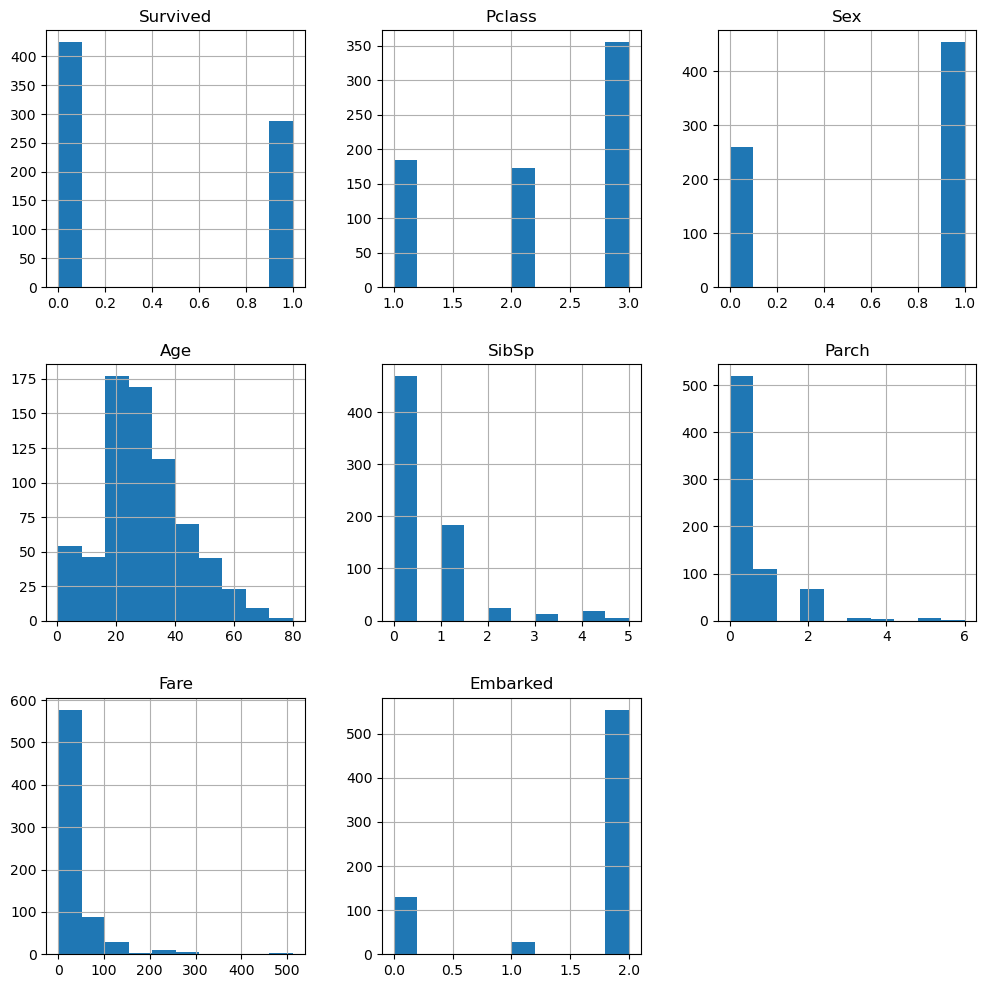

In [21]:
plt.figure(figsize=(12, 12))
df.hist(figsize=(12, 12))
plt.show()

### Show Distribution Plot of survival

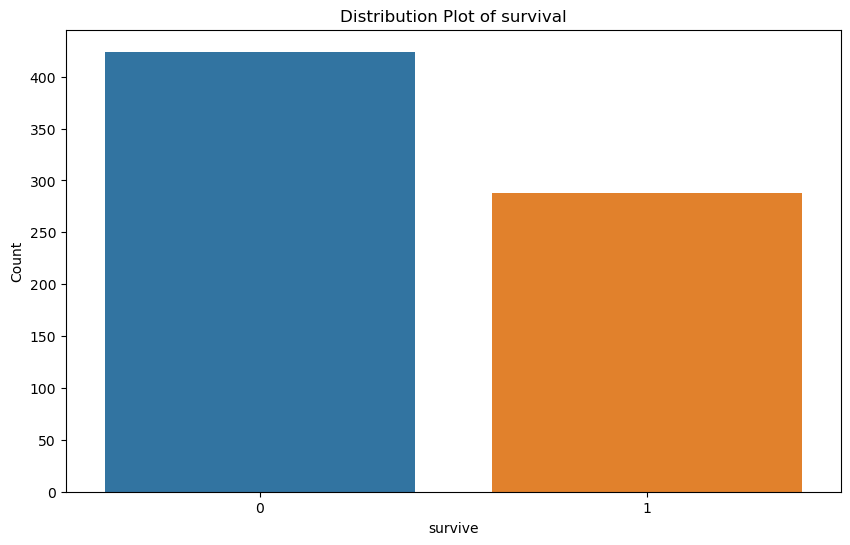

In [22]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Survived', data=df)
plt.title('Distribution Plot of survival')### Show Distribution Plot of Letters
plt.xlabel('survive')
plt.ylabel('Count')
plt.show()

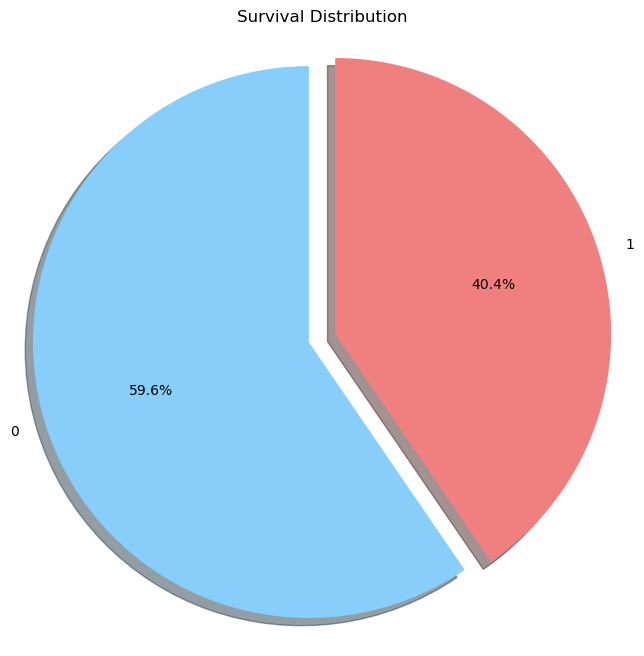

In [23]:
# Count the occurrences of each unique value in the 'Survived' column
survived_counts = df['Survived'].value_counts()

# Colors for the pie chart
colors = ['lightskyblue', 'lightcoral']

# Explode a slice if needed (e.g., explode the second slice)
explode = (0, 0.1)

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(survived_counts, labels=survived_counts.index, autopct='%1.1f%%', startangle=90, colors=colors, explode=explode, shadow=True)
plt.title('Survival Distribution')
plt.axis('equal') 
plt.show()

# Data Preprocessing

### Separate our data to depended and independed features

In [24]:
x = df[['Sex','Pclass','Age','SibSp',"Parch",'Fare','Embarked']]
y = df['Survived']

### Scale our Data

In [25]:
x = preprocessing.StandardScaler().fit(x).transform(x.astype(float))


In [26]:
x

array([[ 0.75613751,  0.90859974, -0.52766856, ..., -0.50678737,
        -0.51637992,  0.51958818],
       [-1.32251077, -1.48298257,  0.57709388, ..., -0.50678737,
         0.69404605, -2.04948671],
       [-1.32251077,  0.90859974, -0.25147795, ..., -0.50678737,
        -0.50362035,  0.51958818],
       ...,
       [-1.32251077, -1.48298257, -0.73481151, ..., -0.50678737,
        -0.08633507,  0.51958818],
       [ 0.75613751, -1.48298257, -0.25147795, ..., -0.50678737,
        -0.08633507, -2.04948671],
       [ 0.75613751,  0.90859974,  0.16280796, ..., -0.50678737,
        -0.50692839, -0.76494927]])

### Split our data to training and test sets

In [27]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=40)
print('trainig size',x_train.shape,y_train.shape)
print('test size',x_test.shape,y_test.shape)

trainig size (569, 7) (569,)
test size (143, 7) (143,)


# Lets Build some models and compare between them
1. K-Nearest-neighbors
2. Decision-Tree
3. SVM
4. Logistic Regression

# 1- K-Nearest-neighbors

### Choose the best K to implement in model

In [28]:
k_values = range(1, 11)  # You can choose a suitable range for k
accuracies = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train, y_train)
    y_pred = knn.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)

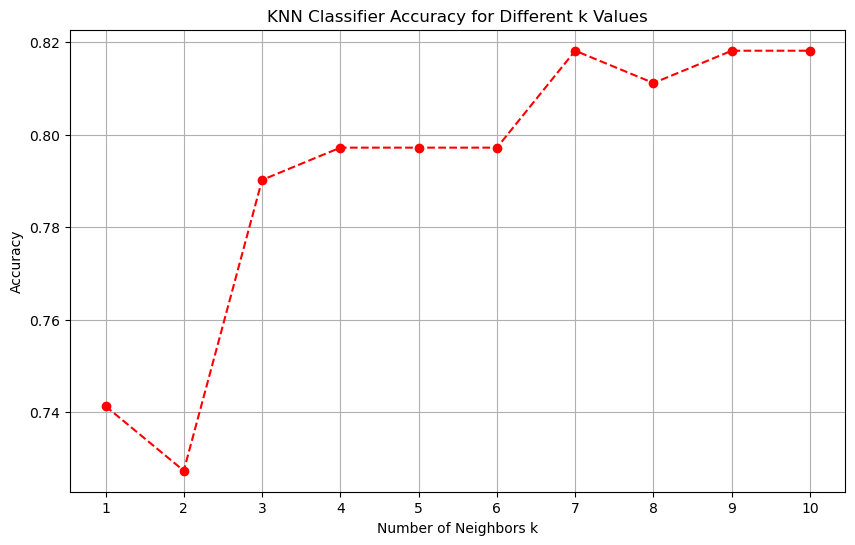

In [29]:
plt.figure(figsize=(10, 6))
plt.plot(k_values, accuracies, marker='o', linestyle='--', color='r')
plt.title('KNN Classifier Accuracy for Different k Values')
plt.xlabel('Number of Neighbors k')
plt.ylabel('Accuracy')
plt.xticks(k_values)
plt.grid()
plt.show()

### K = 7 is best for model

### Build model 

In [30]:
KNN = KNeighborsClassifier(n_neighbors = 7).fit(x_train,y_train)
KNN

KNeighborsClassifier(n_neighbors=7)

In [31]:
y_hat_KNN = KNN.predict(x_test)
y_hat_KNN[0:5]

array([1, 1, 1, 0, 0], dtype=int64)

# Evaluation

In [32]:
accuracy_KNN =  metrics.accuracy_score(y_test, y_hat_KNN)
print("Accuracy: ",accuracy_KNN)

Accuracy:  0.8181818181818182


### confusion matrix

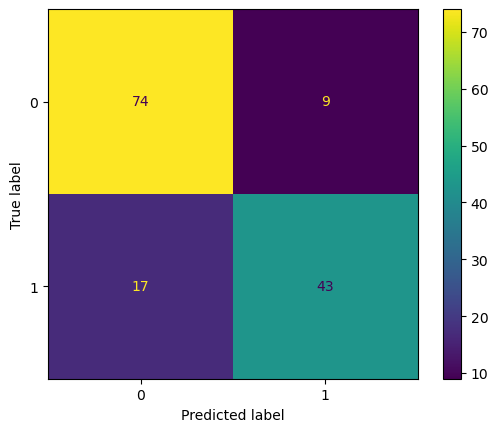

In [33]:
matrix = confusion_matrix(y_test, y_hat_KNN)
dis = ConfusionMatrixDisplay(matrix)
dis.plot()
plt.show()

In [34]:
# Assuming y_test and y_pred are the true and predicted labels respectively
report_1 = classification_report(y_test, y_hat_KNN)

# Print the classification report
print(report_1)
f1_KNN = metrics.f1_score(y_test, y_hat_KNN)
jaccard_KNN = jaccard_score(y_test, y_hat_KNN,pos_label=0)
print("F1_score : ",f1_KNN)
print('jaccard_score',jaccard_KNN)

              precision    recall  f1-score   support

           0       0.81      0.89      0.85        83
           1       0.83      0.72      0.77        60

    accuracy                           0.82       143
   macro avg       0.82      0.80      0.81       143
weighted avg       0.82      0.82      0.82       143

F1_score :  0.7678571428571429
jaccard_score 0.74


### use model to predict

In [35]:
# Reshape the provided data into a 2D numpy array
new_data = np.array([[1,3,26,1,0,8,2]])

new_data = pd.DataFrame(new_data)
# Scale the new data using the fitted scaler
new_data_scaled = preprocessing.StandardScaler().fit(new_data).transform(x.astype(float))

# Use the SVM model to predict the letter for the new data
predicted_survive = KNN.predict(new_data_scaled)

if predicted_survive[0] == 0 :
    print("Not survive:", predicted_survive[0])
else :
    print("Survive:", predicted_survive[0])


Survive: 1


# 2- Decision tree

### Build model 

In [36]:
tree = DecisionTreeClassifier(criterion = 'entropy' , max_depth=4)
tree

DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [37]:
tree.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [38]:
y_hat_tree = tree.predict(x_test)

# Evaluation

In [39]:
accuracy_tree = metrics.accuracy_score(y_test ,y_hat_tree )
print('Accuracy : ',accuracy_tree )

Accuracy :  0.7902097902097902


### confusion matrix

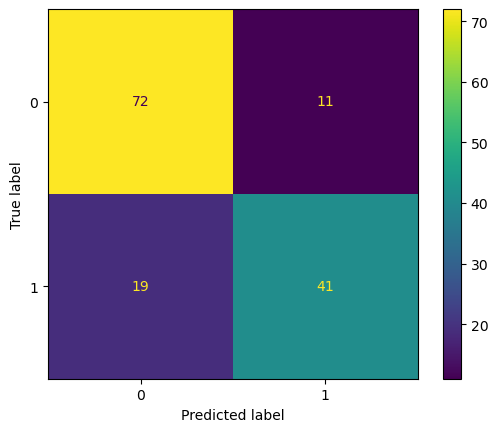

In [40]:
matrix = confusion_matrix(y_test, y_hat_tree)
dis = ConfusionMatrixDisplay(matrix)
dis.plot()
plt.show()

In [41]:
report_2 = classification_report(y_test ,y_hat_tree)
# Print the classification report
print(report_2)
f1_tree = metrics.f1_score(y_test, y_hat_tree)
jaccard_tree= jaccard_score(y_test, y_hat_tree,pos_label=0)
print("F1_score : ",f1_tree)
print('jaccard_score',jaccard_tree)

              precision    recall  f1-score   support

           0       0.79      0.87      0.83        83
           1       0.79      0.68      0.73        60

    accuracy                           0.79       143
   macro avg       0.79      0.78      0.78       143
weighted avg       0.79      0.79      0.79       143

F1_score :  0.7321428571428571
jaccard_score 0.7058823529411765


### use model to predict

In [42]:
# Reshape the provided data into a 2D numpy array
new_data = np.array([[1,3,26,1,0,8,2]])

### use model to predictew_data = pd.DataFrame(new_data)
# Scale the new data using the fitted scaler
new_data_scaled = preprocessing.StandardScaler().fit(new_data).transform(x.astype(float))

# Use the SVM model to predict the letter for the new data
predicted_survive = tree.predict(new_data_scaled)

if predicted_survive[0] == 0 :
    print("Not survive:", predicted_survive[0])
else :
    print("Survive:", predicted_survive[0])


Survive: 1


# 3- SVM

### Build model 

In [43]:
sv = svm.SVC(kernel = 'rbf',C=1)
sv

SVC(C=1)

In [44]:
sv.fit(x_train,y_train)

SVC(C=1)

In [45]:
y_hat_svm = sv.predict(x_test)

# Evaluation

In [46]:
accuracy_svm = metrics.accuracy_score(y_test ,y_hat_svm )
print('Accuracy : ',accuracy_svm )

Accuracy :  0.8251748251748252


### confusion matrix

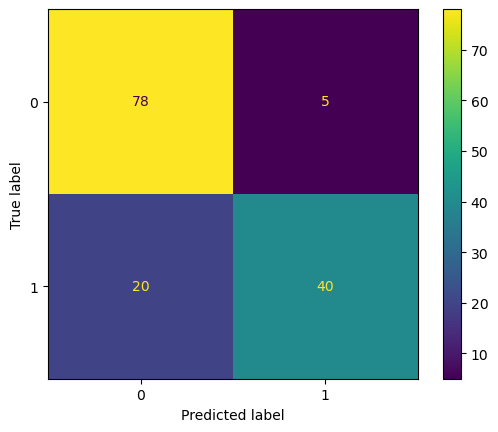

In [47]:
matrix = confusion_matrix(y_test, y_hat_svm)
dis = ConfusionMatrixDisplay(matrix)
dis.plot()
plt.show()

In [48]:
report_3 = classification_report(y_test ,y_hat_svm)
# Print the classification report
print(report_3)
f1_svm = metrics.f1_score(y_test, y_hat_svm, average='weighted')
jaccard_svm= jaccard_score(y_test, y_hat_svm,pos_label=0)
print("F1_score : ",f1_svm)
print('jaccard_score',jaccard_svm)

              precision    recall  f1-score   support

           0       0.80      0.94      0.86        83
           1       0.89      0.67      0.76        60

    accuracy                           0.83       143
   macro avg       0.84      0.80      0.81       143
weighted avg       0.83      0.83      0.82       143

F1_score :  0.8199314497657039
jaccard_score 0.7572815533980582


In [49]:
# Reshape the provided data into a 2D numpy array
new_data = np.array([[1,3,26,1,0,8,2]])

new_data = pd.DataFrame(new_data)
# Scale the new data using the fitted scaler
new_data_scaled = preprocessing.StandardScaler().fit(new_data).transform(x.astype(float))

# Use the SVM model to predict the letter for the new data
predicted_survive = sv.predict(new_data_scaled)

if predicted_survive[0] == 0 :
    print("Not survive:", predicted_survive[0])
else :
    print("Survive:", predicted_survive[0])


Survive: 1


# 4- Logistic Regression 

### Build model 

In [50]:
LR = LogisticRegression(C=0.01, solver='sag').fit(x_train,y_train)
LR

LogisticRegression(C=0.01, solver='sag')

In [51]:
yhat_log = LR.predict(x_test)
yhat_log

array([1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0], dtype=int64)

In [52]:
yhat_prob = LR.predict_proba(x_test)
yhat_prob

array([[0.37128843, 0.62871157],
       [0.28492987, 0.71507013],
       [0.42438253, 0.57561747],
       [0.70321817, 0.29678183],
       [0.51703931, 0.48296069],
       [0.3997357 , 0.6002643 ],
       [0.49112783, 0.50887217],
       [0.81019312, 0.18980688],
       [0.46116424, 0.53883576],
       [0.79289088, 0.20710912],
       [0.6682242 , 0.3317758 ],
       [0.78959609, 0.21040391],
       [0.75478947, 0.24521053],
       [0.76277187, 0.23722813],
       [0.22833977, 0.77166023],
       [0.35534571, 0.64465429],
       [0.50142666, 0.49857334],
       [0.78129457, 0.21870543],
       [0.2560834 , 0.7439166 ],
       [0.17470973, 0.82529027],
       [0.43210238, 0.56789762],
       [0.82634348, 0.17365652],
       [0.65675188, 0.34324812],
       [0.70960393, 0.29039607],
       [0.7011453 , 0.2988547 ],
       [0.83402809, 0.16597191],
       [0.80858564, 0.19141436],
       [0.68769702, 0.31230298],
       [0.50325744, 0.49674256],
       [0.50103914, 0.49896086],
       [0.

# Evaluation

In [53]:
accuracy_logistic = metrics.accuracy_score(y_test ,yhat_log )
print('Accuracy : ',accuracy_logistic )

Accuracy :  0.7692307692307693


### confusion matrix

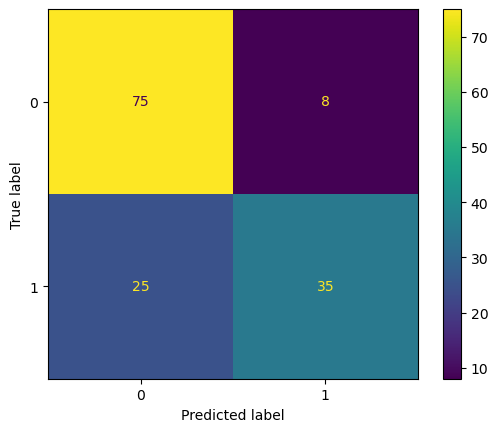

In [54]:
matrix = confusion_matrix(y_test, yhat_log)
dis = ConfusionMatrixDisplay(matrix)
dis.plot()
plt.show()

In [55]:
report_4 = classification_report(y_test ,yhat_log)
# Print the classification report
print(report_4)
f1_logistic = metrics.f1_score(y_test, yhat_log, average='weighted')
jaccard_logistic= jaccard_score(y_test, yhat_log,pos_label=0)
print("F1_score : ",f1_logistic)
print('jaccard_score',jaccard_logistic)
print('log_loss',log_loss(y_test, yhat_prob))

              precision    recall  f1-score   support

           0       0.75      0.90      0.82        83
           1       0.81      0.58      0.68        60

    accuracy                           0.77       143
   macro avg       0.78      0.74      0.75       143
weighted avg       0.78      0.77      0.76       143

F1_score :  0.7609054959047001
jaccard_score 0.6944444444444444
log_loss 0.5252543046004268


In [56]:
# Reshape the provided data into a 2D numpy array
new_data = np.array([[1,3,26,1,0,8,2]])

new_data = pd.DataFrame(new_data)
# Scale the new data using the fitted scaler
new_data_scaled = preprocessing.StandardScaler().fit(new_data).transform(x.astype(float))

# Use the SVM model to predict the letter for the new data
predicted_survive = LR.predict(new_data_scaled)

if predicted_survive[0] == 0 :
    print("Not survive:", predicted_survive[0])
else :
    print("Survive:", predicted_survive[0])


Survive: 1


# Compare between Algorithms 

In [57]:
algorithm = pd.DataFrame([
    {'Model Name':'KNN' , 'Accuracy' : accuracy_KNN,'Jaccard':jaccard_KNN , 'F1-score':f1_KNN },
    {'Model Name':'Decision Tree' , 'Accuracy' : accuracy_tree,'Jaccard':jaccard_tree , 'F1-score':f1_tree },
    {'Model Name':'SVM' , 'Accuracy' : accuracy_svm,'Jaccard':jaccard_svm , 'F1-score':f1_svm },
    {'Model Name':'Logistic Regression' , 'Accuracy' : accuracy_logistic,'Jaccard':jaccard_logistic , 'F1-score':f1_logistic }
])
algorithm

,Model Name,Accuracy,Jaccard,F1-score
0,KNN,0.818182,0.740000,0.767857
1,Decision Tree,0.790210,0.705882,0.732143
2,SVM,0.825175,0.757282,0.819931
3,Logistic Regression,0.769231,0.694444,0.760905


### compare based on F1-score

In [58]:
# Finding the index and value of the largest F1-score
max_f1_index = algorithm['F1-score'].idxmax()
max_f1_value = algorithm.loc[max_f1_index]

max_f1_value

Model Name         SVM
Accuracy      0.825175
Jaccard       0.757282
F1-score      0.819931
Name: 2, dtype: object

#### SVM has Largest f1-score